In [ ]:
pip install numpy pandas yfinance statsmodels matplotlib plotly plotly_express

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns

##Simulating stock price dynamics using Geometric Brownian Motion

Import libraries:

In [108]:
import numpy as np
import pandas as pd
import yfinance as yf

Define parameters, Case Telkomsel stock

In [109]:
RISKY_ASSET = 'TLKM.JK'
START_DATE = '2019-01-01'
END_DATE = '2023-12-31'

In [110]:
df = yf.download(RISKY_ASSET, start=START_DATE, end=END_DATE)

print(f'Downloaded {df.shape[0]} rows of data.')
df.head()

[*********************100%***********************]  1 of 1 completed

Downloaded 1231 rows of data.


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TLKM.JK,TLKM.JK,TLKM.JK,TLKM.JK,TLKM.JK,TLKM.JK
Date,,,,,,
2019-01-01 00:00:00+00:00,2883.207275,3750.0,3750.0,3750.0,3750.0,0
2019-01-02 00:00:00+00:00,2867.830322,3730.0,3760.0,3700.0,3750.0,31355300
2019-01-03 00:00:00+00:00,2875.518799,3740.0,3770.0,3690.0,3710.0,83842400
2019-01-04 00:00:00+00:00,2852.453125,3710.0,3740.0,3690.0,3690.0,73936900
2019-01-07 00:00:00+00:00,2898.584473,3770.0,3790.0,3750.0,3760.0,83678100


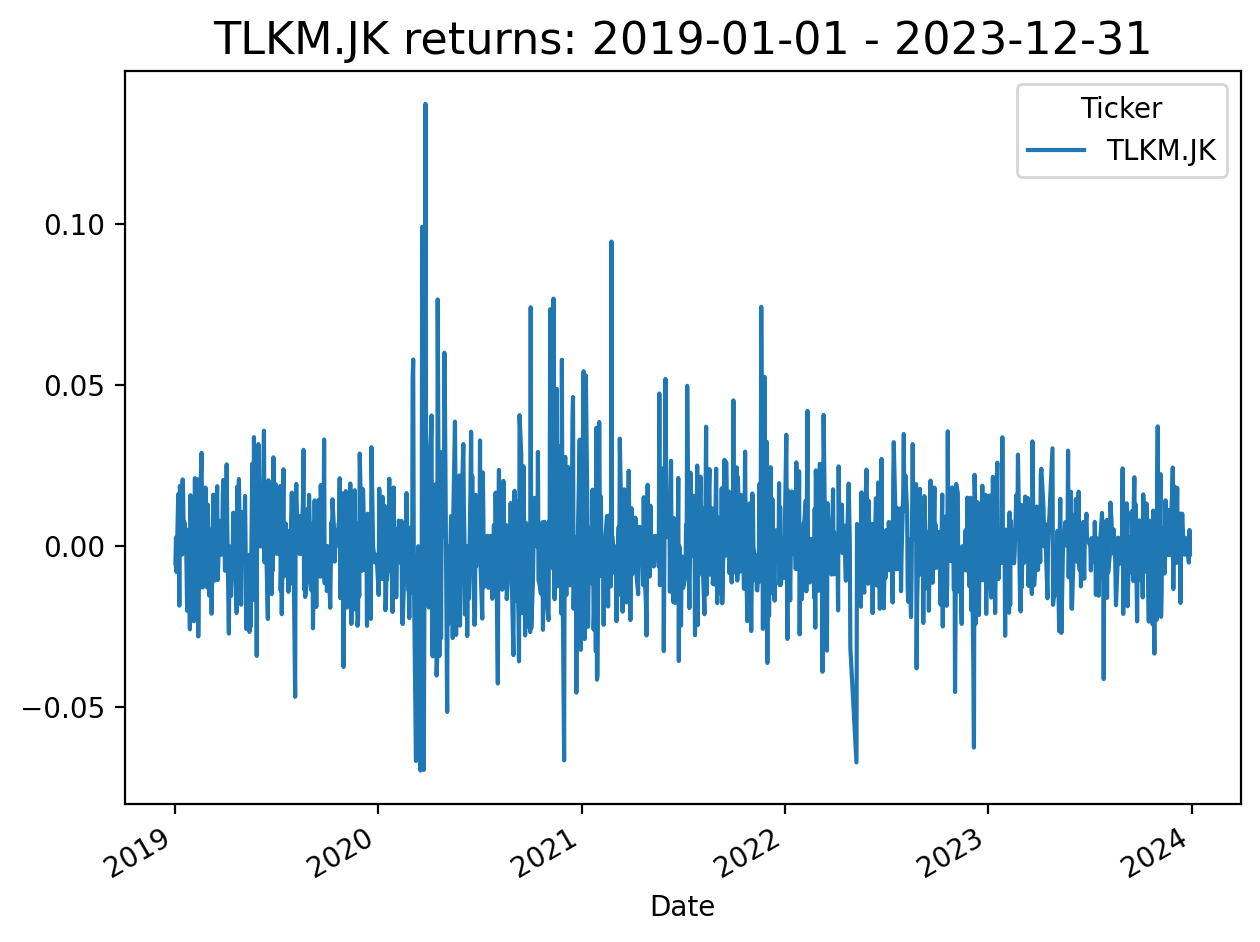

Average return: 0.04%


In [111]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()

ax = returns.plot()
ax.set_title(f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}',
             fontsize=16)

plt.tight_layout()
plt.show()

# Extract the numeric value from the Series before formatting
avg_return = returns.mean().iloc[0]  # Access the first element of the Series
print(f'Average return: {100 * avg_return:.2f}%')

In [112]:
train = returns['2019-01-01':'2021-06-30']
test = returns['2021-07-01':'2023-12-31']

In [113]:
T = len(test)  # Number of days in the test set
N = len(test)  # Number of simulation steps (same as T)
s_0 = adj_close.loc[train.index[-1]]  # Get the last adjusted close price from the training set
N_SIM = 100  # Number of simulations
mu = train.mean()  # Mean return from the training set
sigma = train.std()  # Standard deviation of returns from the training set

# Check the values to ensure they are correct
print(f"Initial stock price (s_0): {s_0}")
print(f"Mean return (mu): {mu}")
print(f"Volatility (sigma): {sigma}")

Initial stock price (s_0): Ticker
TLKM.JK    2748.208008
Name: 2021-06-30 00:00:00+00:00, dtype: float64
Mean return (mu): Ticker
TLKM.JK    0.000138
dtype: float64
Volatility (sigma): Ticker
TLKM.JK    0.02089
dtype: float64


In [114]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N,
                random_seed=42):
    '''
    Function used for simulating stock returns using Geometric Brownian Motion.

    Parameters
    ------------
    s_0 : float
    Initial stock price
    mu : float
    Drift coefficient
    sigma : float
    Diffusion coefficient
    n_sims : int
    Number of simulations paths
    dt : float
    Time increment, most commonly a day
    T : float
    Length of the forecast horizon, same unit as dt
    N : int
    Number of time increments in the forecast horizon
    random_seed : int
    Random seed for reproducibility

    Returns
    -----------
    S_t : np.ndarray
    Matrix (size: n_sims x (T+1)) containing the simulation results.
    Rows respresent sample paths, while columns point of time.
    '''''
    np.random.seed(random_seed)

    dt = T/N
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)

    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))

    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps
                      + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)

    return S_t

###Run the Simulation

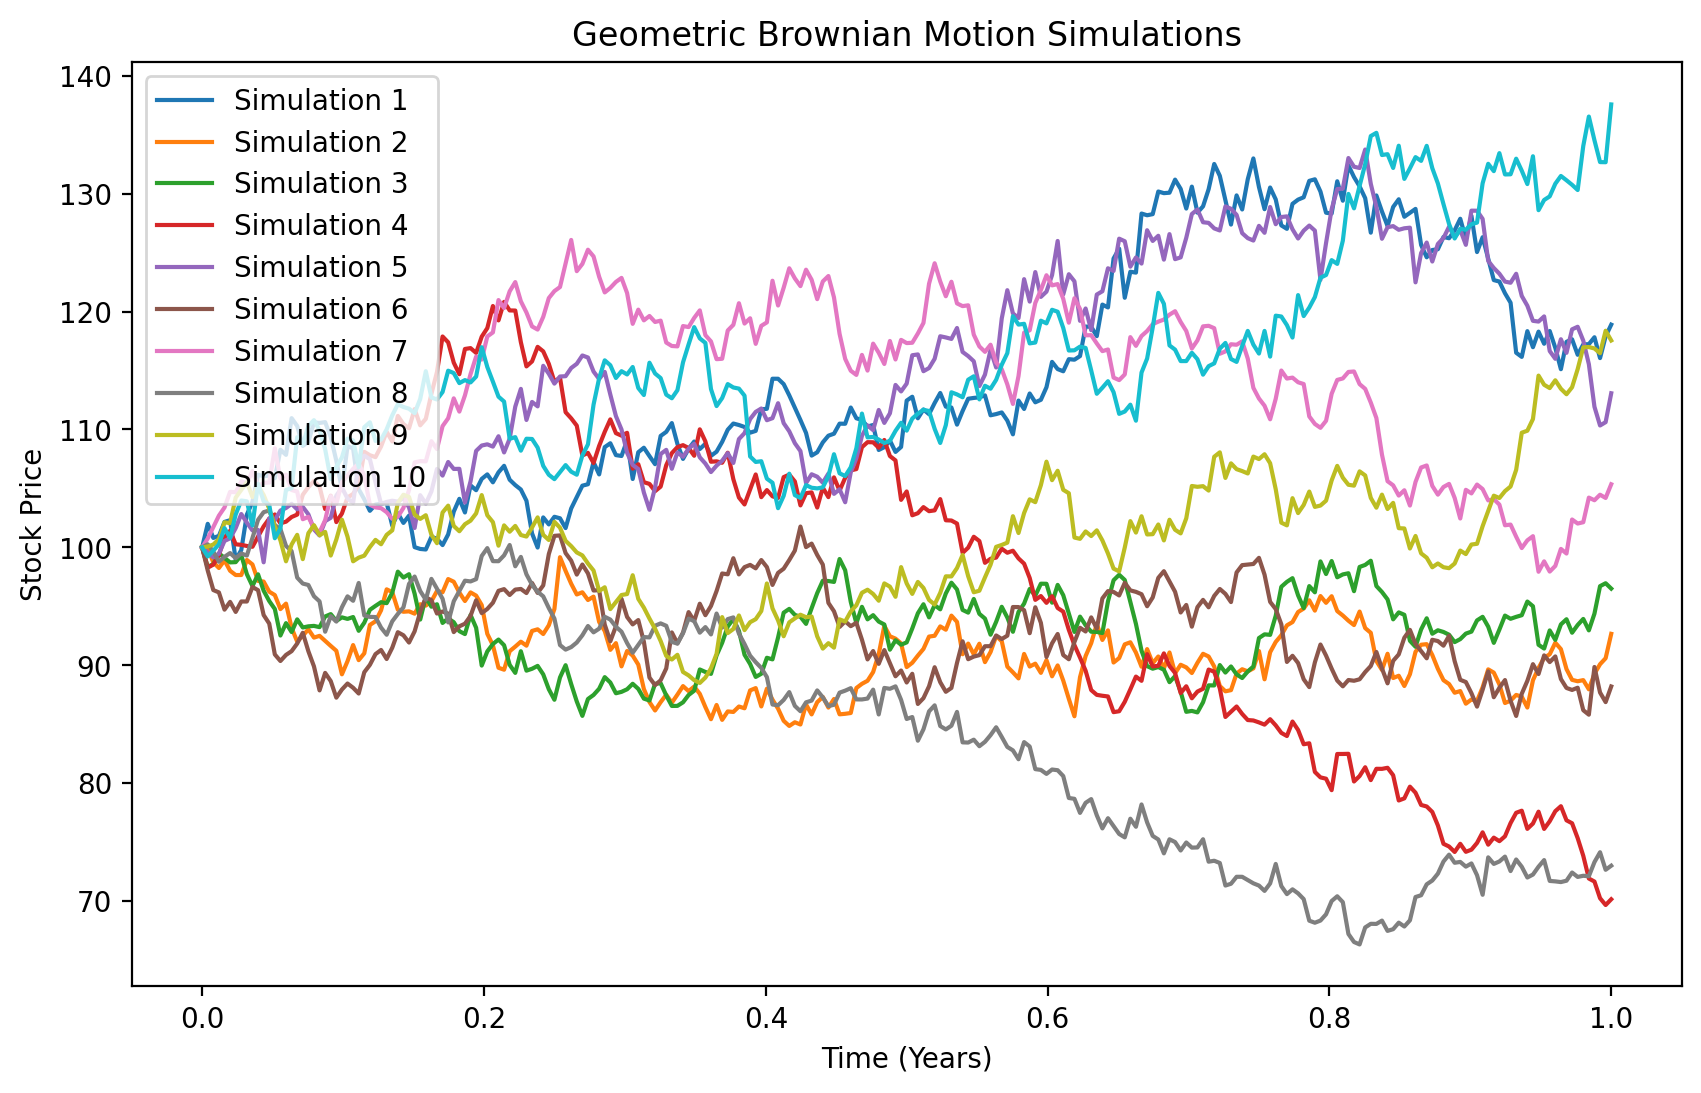

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gbm(s_0, mu, sigma, N_SIM, T, N):
    dt = T / N  # Time step
    time = np.linspace(0, T, N+1)  # Time points
    paths = np.zeros((N_SIM, N+1))  # Array to store the simulated paths

    # Initial value for all paths
    paths[:, 0] = s_0

    # Simulate each path
    for i in range(1, N+1):
        # Random component (normally distributed)
        dW = np.random.normal(0, np.sqrt(dt), N_SIM)  # Brownian motion increments
        # GBM formula: S(t) = S(t-1) * exp((mu - 0.5 * sigma^2) * dt + sigma * dW)
        paths[:, i] = paths[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

    return time, paths

# Example usage
s_0 = 100  # Initial stock price
mu = 0.05  # Drift (5%)
sigma = 0.2  # Volatility (20%)
N_SIM = 10  # Number of simulations
T = 1  # Total time (1 year)
N = 252  # Number of time steps (daily steps, for example)

time, gbm_simulations = simulate_gbm(s_0, mu, sigma, N_SIM, T, N)

# Plot the simulations
plt.figure(figsize=(10, 6))
for i in range(N_SIM):
    plt.plot(time, gbm_simulations[i], label=f"Simulation {i+1}")
plt.title('Geometric Brownian Motion Simulations')
plt.xlabel('Time (Years)')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

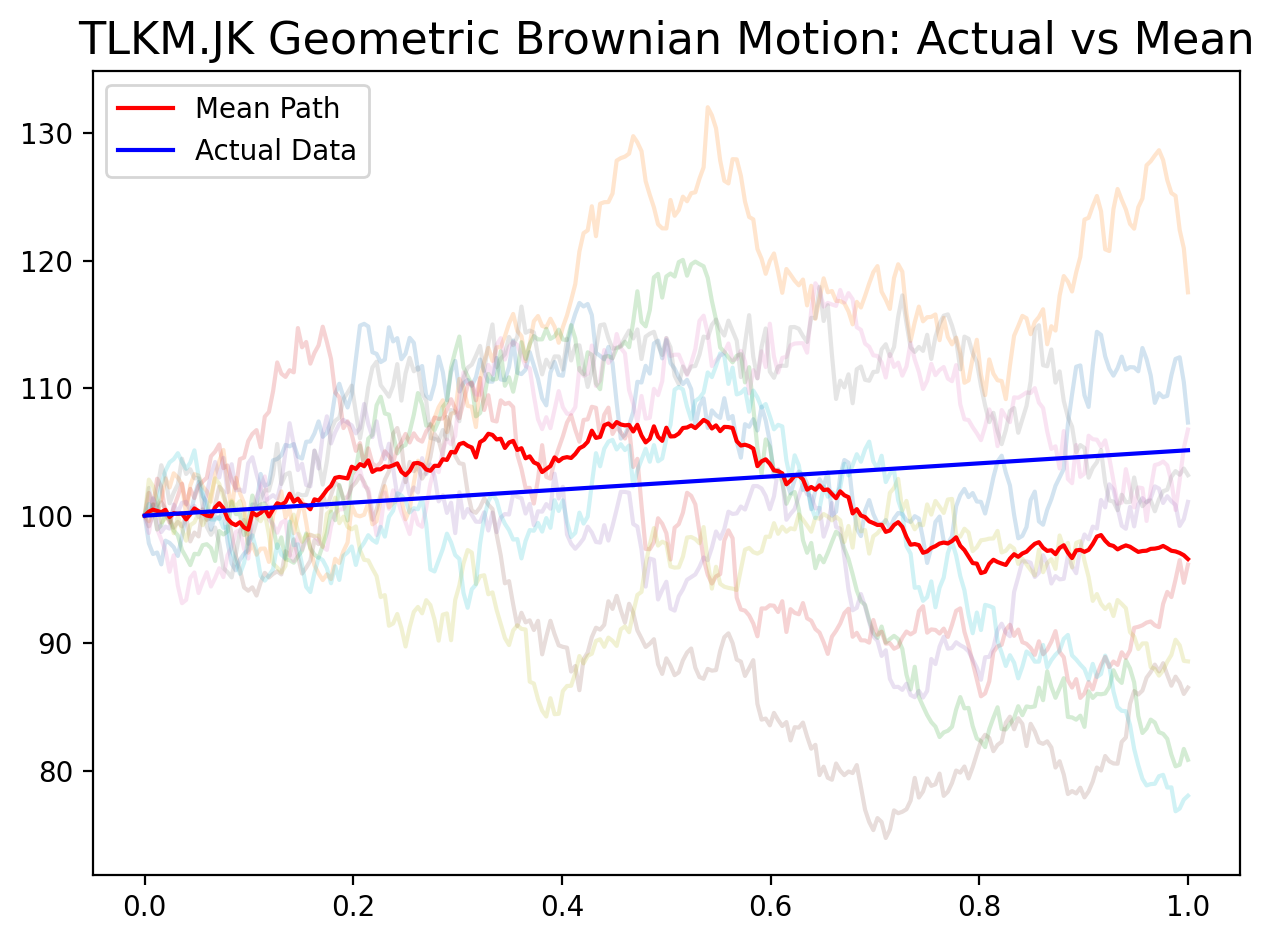

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate_gbm(s_0, mu, sigma, N_SIM, T, N):
    dt = T / N
    time = np.linspace(0, T, N+1)
    paths = np.zeros((N_SIM, N+1))
    paths[:, 0] = s_0
    for i in range(1, N+1):
        dW = np.random.normal(0, np.sqrt(dt), N_SIM)
        paths[:, i] = paths[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)
    return time, paths

# Parameters
s_0, mu, sigma, N_SIM, T, N = 100, 0.05, 0.2, 10, 1, 252

# Run simulation
time, gbm_simulations = simulate_gbm(s_0, mu, sigma, N_SIM, T, N)

# Simulate actual data (for illustration purposes)
# Replace this with your actual data if available
actual_data = np.linspace(s_0, s_0 * np.exp(mu * T), N+1)

# Convert the simulated paths to a pandas DataFrame
gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), index=time)

# Plot the results
plt.figure(figsize=(10, 6))

ax = gbm_simulations_df.plot(alpha=0.2, legend=False)  # Plot actual simulations
line_1, = ax.plot(time, gbm_simulations_df.mean(axis=1), color='red')  # Mean path
line_2, = ax.plot(time, actual_data, color='blue')  # Actual data (replace with your real data)

# Titles and labels
ax.set_title('TLKM.JK Geometric Brownian Motion: Actual vs Mean', fontsize=16)
ax.legend([line_1, line_2], ['Mean Path', 'Actual Data'])

plt.tight_layout()
plt.show()

In [117]:
%timeit gbm_simulations = simulate_gbm(s_0, mu, sigma, N_SIM, T, N)

2.32 ms ± 163 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [118]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, random_seed=42, antithetic_var=False):
    '''
    Function used for simulating stock returns using Geometric Brownian Motion.

    Parameters
    ------------
    s_0 : float
    Initial stock price
    mu : float
    Drift coefficient
    sigma : float
    Diffusion coefficient
    n_sims : int
    Number of simulations paths
    dt : float
    Time increment, most commonly a day
    T : float
    Length of the forecast horizon, same unit as dt
    N : int
    Number of time increments in the forecast horizon
    random_seed : int
    Random seed for reproducibility
    antithetic_var : bool
    Boolean whether to use antithetic variates approach to reduce variance

    Returns
    -----------
    S_t : np.ndarray
    Matrix (size: n_sims x (T+1)) containing the simulation results.
    Rows respresent sample paths, while columns point of time.
    '''''

    np.random.seed(random_seed)

    # time increment
    dt = T/N

    # Brownian
    if antithetic_var:
        dW_ant = np.random.normal(scale = np.sqrt(dt),
                                     size=(int(n_sims/2), N + 1))
        dW = np.concatenate((dW_ant, -dW_ant), axis=0)
    else:
        dW = np.random.normal(scale = np.sqrt(dt),
                                     size=(n_sims, N + 1))

    # simulate the evolution of the process
    S_t = s_0 * np.exp(np.cumsum((mu - 0.5 * sigma ** 2) * dt + sigma * dW,
                                            axis=1))
    S_t[:, 0] = s_0

    return S_t

In [119]:
%timeit gbm_simulations = simulate_gbm(s_0, mu, sigma, N_SIM, T, N)

155 µs ± 29 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [120]:
%timeit gbm_simulations = simulate_gbm(s_0, mu, sigma, N_SIM, T, N, antithetic_var=True)

121 µs ± 26.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#Pricing European Options using Simulations

In [121]:
load /content/chapter_6_utils.py

In [122]:
import numpy as np
from scipy.stats import norm
from chapter_6_utils import simulate_gbm

In [123]:
S_0 = 100
K = 100
r = 0.05
sigma = 0.50
T = 1 # 1 year
N = 252 # 252 days in a year
dt = T / N # time step
N_SIMS = 100000 # number of simulations
discount_factor = np.exp(-r * T)

In [124]:
def black_scholes_analytical(S_0, K, T, r, sigma, type='call'):
    '''
    Function used for calculating the price of European options using the analytical form of the Black-Scholes model.

    Parameters
    ------------
    s_0 : float
    Initial stock price
    K : float
    Strike price
    T : float
    Time to maturity in years
    r : float
    Annualized risk-free rate
    sigma : float
    Standard deviation of the stock returns
    type : str
    Type of the option. Allowable: ['call', 'put']

    Returns
    -----------
    option_premium : float
    The premium on the option calculated using the Black-Scholes model
    '''''

    d1 = (np.log(S_0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S_0 / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

    if type == 'call':
        val = (S_0 * norm.cdf(d1, 0, 1) - K * np.exp(-r * T) * norm.cdf(d2, 0, 1))
    elif type == 'put':
        val = (K * np.exp(-r * T) * norm.cdf(-d2, 0, 1) - S_0 * norm.cdf(-d1, 0, 1))
    else:
        raise ValueError('Wrong input for type!')

    return val

In [125]:
black_scholes_analytical(S_0=S_0, K=K, T=T, r=r, sigma=sigma, type='call')

21.79260421286685

Simulate the stock path using GBM:

In [126]:
gbm_sims = simulate_gbm(s_0=S_0, mu=r, sigma=sigma,
                       n_sims=N_SIMS, T=T, N=N)

Calculate the option premium:

In [127]:
premium = discount_factor * np.mean(np.maximum(0, gbm_sims[:, -1] - K))
premium

21.63279839570765

#Pricing American Options with Least Squares Monte Carlo

Import the libraries:

In [128]:
import numpy as np
from chapter_6_utils import (simulate_gbm,
                            black_scholes_analytical,
                            lsmc_american_option)

Define the parameters:

In [129]:
S_0 = 36
K = 40
r = 0.06
sigma = 0.2
T = 1 # 1 year
N = 50
dt = T / N
N_SIMS = 10 ** 5
discount_factor = np.exp(-r * dt)
OPTION_TYPE = 'put'
POLY_DEGREE = 5

Simulate the stock prices using GBM:

In [130]:
gbm_sims = simulate_gbm(s_0=S_0, mu=r, sigma=sigma, n_sims=N_SIMS,
                       T=T, N=N)

Calculate the payoff matrix:

In [131]:
payoff_matrix = np.maximum(K - gbm_sims, np.zeros_like(gbm_sims))

Define the value matrix and fill in the last column (time T):

In [132]:
value_matrix = np.zeros_like(payoff_matrix)
value_matrix[:, -1] = payoff_matrix[:, -1]

Iteratively calculate the continuation value and the value vector in the given time:

In [133]:
for t in range(N - 1, 0 , -1):
    regression = np.polyfit(gbm_sims[:, t],
                           value_matrix[:, t + 1] * discount_factor,
                           POLY_DEGREE)
    continuation_value = np.polyval(regression, gbm_sims[:, t])
    value_matrix[:, t] = np.where(
    payoff_matrix[:, t] > continuation_value,
    payoff_matrix[:, t],
    value_matrix[:, t + 1] * discount_factor

    )

Calculate the option premium:

In [134]:
option_premium = np.mean(value_matrix[:, 1] * discount_factor)
print(f'The premium on the specified American {OPTION_TYPE} option is {option_premium:.3f}')

The premium on the specified American put option is 4.465


Calculate the premium of a European put with the same parameters:

In [135]:
black_scholes_analytical(S_0=S_0, K=K, T=T, r=r, sigma=sigma,
                        type='put')

3.84430779159684

As an extra check, calculate the prices of the American and European call options:

In [136]:
european_call_price = black_scholes_analytical(S_0=S_0, K=K, T=T,
                                              r=r, sigma=sigma)
american_call_price = lsmc_american_option(S_0=S_0, K=K, T=T, N=N, r=r,
                                          sigma=sigma, n_sims=N_SIMS,
                                          option_type='call',
                                          poly_degree=POLY_DEGREE)
print(f"The price of the European call is {european_call_price:.3f}, and the American call's price (using {N_SIMS} simulations) is {american_call_price:.3f}")

The price of the European call is 2.174, and the American call's price (using 100000 simulations) is 2.097


#Pricing American Options using Quantlib

Defining parameters:

In [137]:
S_0 = 36
r = 0.06
sigma = 0.2
K = 40
OPTION_TYPE = 'put'
POLY_DEGREE = 5
R_SEED = 42
N_SIMS = 10 ** 5
N = 50

In [138]:
pip install QuantLib

In [139]:
import QuantLib as ql

Specify the calendar and the day counting convention:

In [140]:
import QuantLib as ql

calendar = ql.UnitedStates(ql.UnitedStates.NYSE)
# The ql.ActualActual() constructor now requires an explicit convention.
# Using ql.ActualActual.ISDA to match the previous default behavior.
day_counter = ql.ActualActual(ql.ActualActual.ISDA)

Specify the valuation date and the expiry date of the option:

In [141]:
valuation_date = ql.Date(1, 1, 2022)
expiry_date =  ql.Date(1, 1, 2023)
ql.Settings.instance().evaluationDate = valuation_date

Define the option type (call/put), type of exercise and the payoff:

In [142]:
if OPTION_TYPE == 'call':
    option_type_ql = ql.Option.Call
elif OPTION_TYPE == 'put':
    option_type_ql = ql.Option.Put

exercise = ql.AmericanExercise(valuation_date, expiry_date)
payoff = ql.PlainVanillaPayoff(option_type_ql, K)

Prepare the market-related data:

In [143]:
u = ql.SimpleQuote(S_0)
r = ql.SimpleQuote(r)
sigma = ql.SimpleQuote(sigma)

Specify the market-related curves:

In [144]:
# volatility = ql.BlackConstantVol(valuation_date, calendar, sigma, day_counter)
# risk_free_rate = ql.FlatForward(valuation_date, r, day_counter)
underlying = ql.QuoteHandle(u)
volatility = ql.BlackConstantVol(0, ql.TARGET(),
                                ql.QuoteHandle(sigma),
                                day_counter)
risk_free_rate = ql.FlatForward(0, ql.TARGET(),
                               ql.QuoteHandle(r),
                               day_counter)

Plug in the market-related data into the BS process:

In [145]:
bs_process = ql.BlackScholesProcess(
underlying,
ql.YieldTermStructureHandle(risk_free_rate),
ql.BlackVolTermStructureHandle(volatility),

)

Instantiate the Monte Carlo engine for the American options:

In [146]:
engine = ql.MCAmericanEngine(bs_process, 'PseudoRandom', timeSteps=N,
                            polynomOrder=POLY_DEGREE,
                            seedCalibration=R_SEED,
                            requiredSamples=N_SIMS)

Instantiate the option object and set its pricing engine:

In [147]:
option = ql.VanillaOption(payoff, exercise)
option.setPricingEngine(engine)

Calculate the option premium:

In [148]:
option_premium_ql = option.NPV()

In [149]:
print(f'The value of the American {OPTION_TYPE} option is: {option_premium_ql:.3f}')

The value of the American put option is: 4.461


#Estimating Value-at-risk using Monte Carlo *(Case with Indosat and Telkomsel Stock)*

In [150]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns

In [151]:
# set random seed for reproducibility
np.random.seed(42)

Define the parameters that will be used for this exercise:

In [152]:
RISKY_ASSETS = ['ISAT.JK', 'TLKM.JK']
SHARES = [5, 5]
START_DATE = '2023-01-01'
END_DATE = '2023-12-31'
T = 1
N_SIMS = 10 ** 5

In [153]:
df = yf.download(RISKY_ASSETS, start=START_DATE, end=END_DATE)
print(f'Downloaded {df.shape[0]} rows of data.')

[*********************100%***********************]  2 of 2 completed

Downloaded 239 rows of data.


In [154]:
print(df)

Price                        Adj Close                 Close             High  \
Ticker                         ISAT.JK      TLKM.JK  ISAT.JK TLKM.JK  ISAT.JK   
Date                                                                            
2023-01-02 00:00:00+00:00  1173.774536  3436.561279  1506.25  3800.0  1550.00   
2023-01-03 00:00:00+00:00  1227.349243  3490.822754  1575.00  3860.0  1606.25   
2023-01-04 00:00:00+00:00  1217.608398  3454.648193  1562.50  3820.0  1606.25   
2023-01-05 00:00:00+00:00  1188.385742  3409.430420  1525.00  3770.0  1575.00   
2023-01-06 00:00:00+00:00  1193.256226  3355.168945  1531.25  3710.0  1562.50   
...                                ...          ...      ...     ...      ...   
2023-12-21 00:00:00+00:00  2102.651123  3722.551025  2350.00  3950.0  2362.50   
2023-12-22 00:00:00+00:00  2102.651123  3731.975098  2350.00  3960.0  2362.50   
2023-12-27 00:00:00+00:00  2097.058838  3713.126953  2343.75  3940.0  2356.25   
2023-12-28 00:00:00+00:00  2

Calculate daily returns:

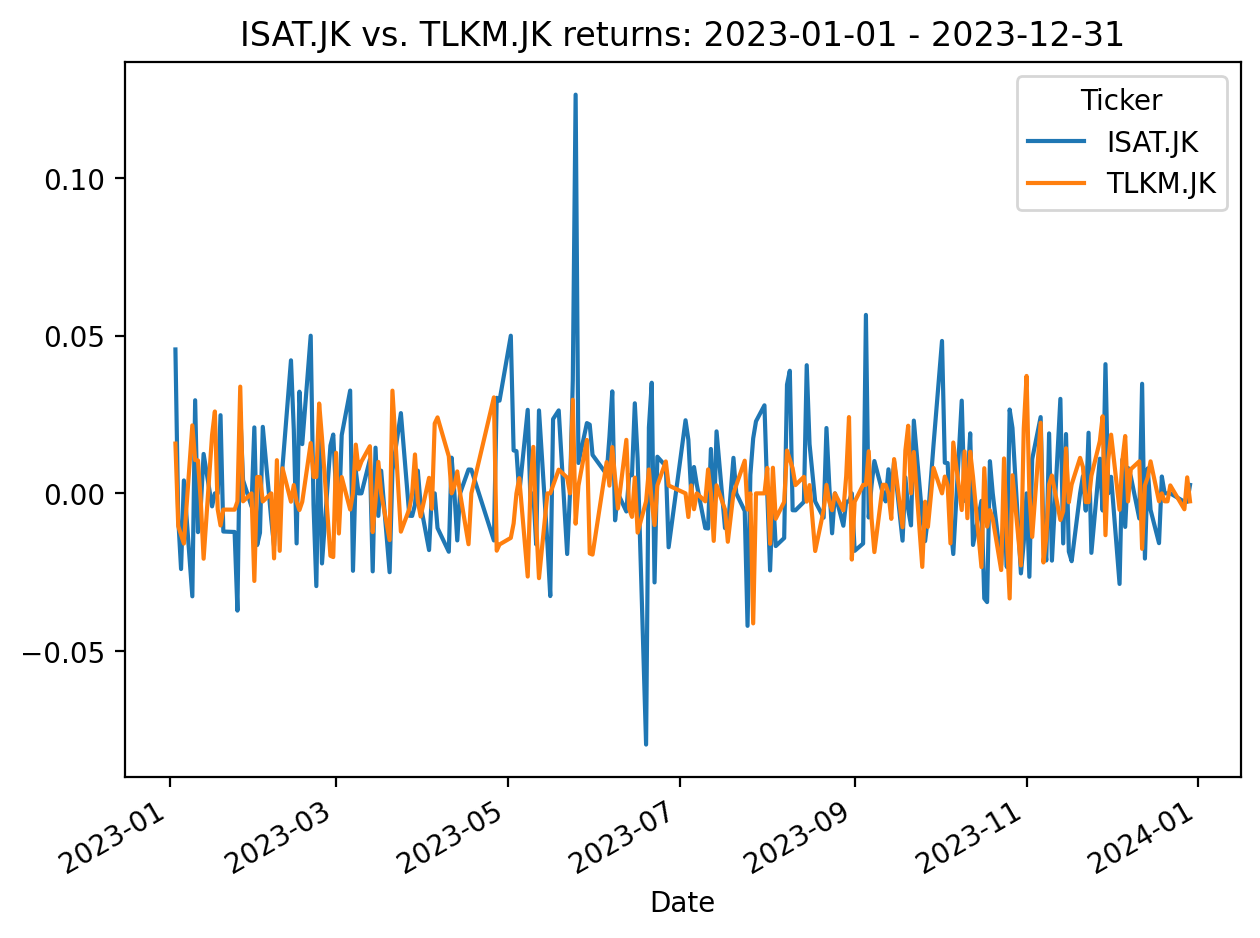

Correlation between returns: -0.00


In [155]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()
plot_title = f'{" vs. ".join(RISKY_ASSETS)} returns: {START_DATE} - {END_DATE}'
returns.plot(title=plot_title)

plt.tight_layout()
plt.show()

print(f'Correlation between returns: {returns.corr().values[0,1]:.2f}')

Calculate the covariance matrix:

In [156]:
cov_mat = returns.cov()
cov_mat

Ticker,ISAT.JK,TLKM.JK
Ticker,,
ISAT.JK,0.000428,-0.000001
TLKM.JK,-0.000001,0.000160


Perform the Cholesky decomposition of the covariance matrix:

In [157]:
chol_mat = np.linalg.cholesky(cov_mat)
chol_mat

array([[ 2.06794593e-02,  0.00000000e+00],
       [-5.12671929e-05,  1.26306797e-02]])

Draw correlated random numbers from Standard Normal distribution:

In [158]:
rv = np.random.normal(size=(N_SIMS, len(RISKY_ASSETS)))
correlated_rv = np.transpose(np.matmul(chol_mat, np.transpose(rv)))

Define metrics used for simulations:

In [159]:
r = np.mean(returns, axis=0).values
sigma = np.std(returns, axis=0).values
S_0 = adj_close.values[-1, :]
P_0 = np.sum(SHARES * S_0)

Calculate the terminal price of the considered stocks:

In [160]:
S_T = S_0 * np.exp((r - 0.5 * sigma ** 2) * T +
                  sigma * np.sqrt(T) * correlated_rv)

Calculate the terminal portfolio value and calculate the portfolio returns:

In [161]:
P_T = np.sum(SHARES * S_T, axis=1)
P_diff = P_T - P_0

Calculate VaR:

In [162]:
P_diff_sorted = np.sort(P_diff)
percentiles = [0.01, 0.1, 1.]
var = np.percentile(P_diff_sorted, percentiles)

for x, y in zip(percentiles, var):
    print(f'1-day VaR with {100-x}% confidence: {-y:.2f}$')

1-day VaR with 99.99% confidence: -12.19$
1-day VaR with 99.9% confidence: -15.46$
1-day VaR with 99.0% confidence: -19.33$


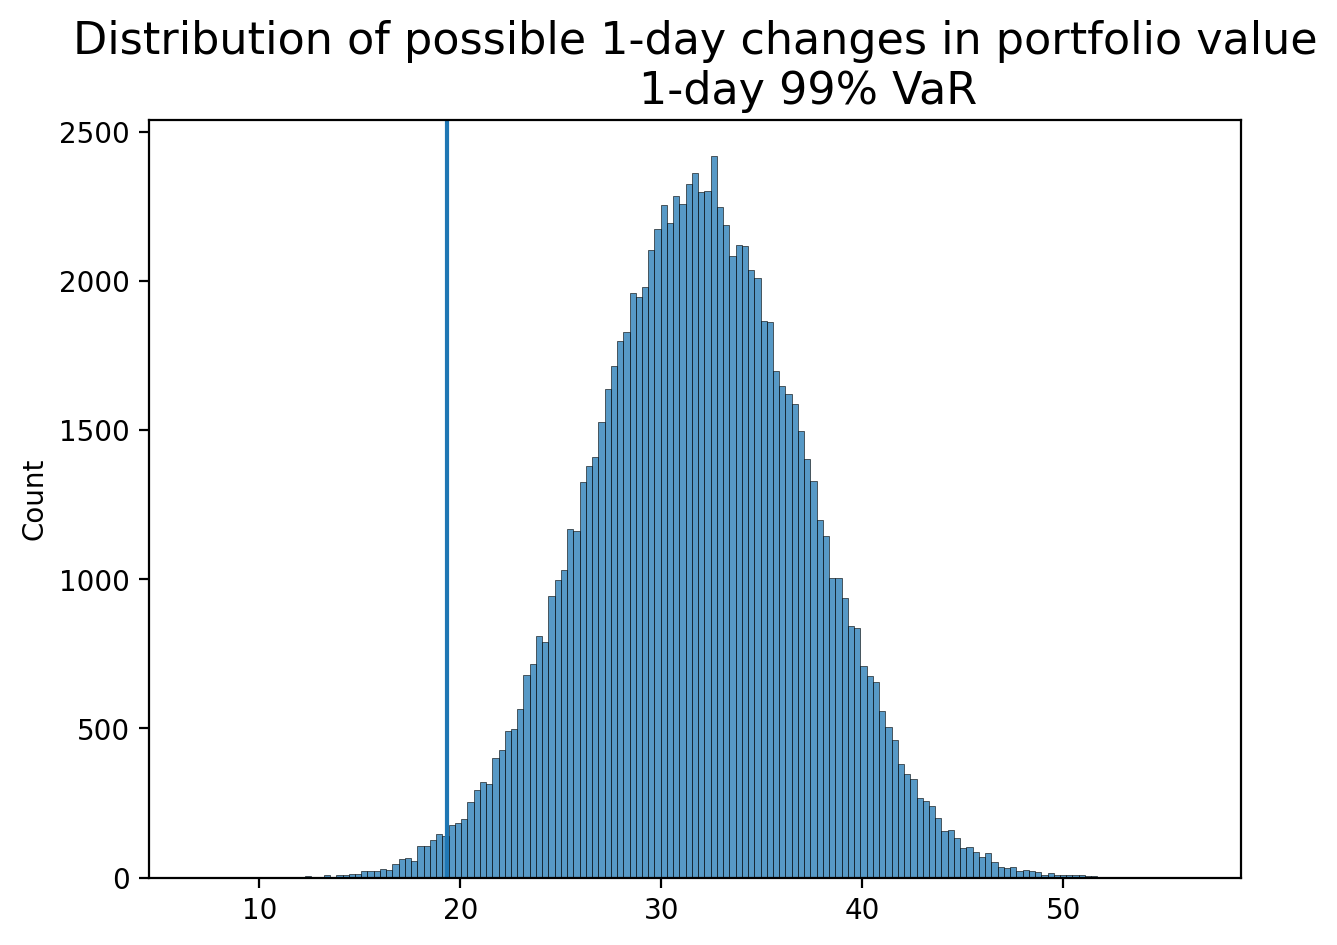

In [166]:
ax = sns.histplot(P_diff, kde=False)
ax.set_title('''Distribution of possible 1-day changes in portfolio value
                1-day 99% VaR''''', fontsize=16)
ax.axvline(var[2], 0, 10000)

plt.tight_layout()
plt.show()

#Price Commodity Futures and Contract

In [167]:
import yfinance as yf
import pandas as pd

# Fetching coffee futures data (e.g., Coffee Futures: KC=F)
symbol = 'KC=F'  # Coffee Futures Symbol
data = yf.download(symbol, start='2010-01-01', end='2024-01-01')

# Checking the data
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,KC=F,KC=F,KC=F,KC=F,KC=F,KC=F
Date,,,,,,
2010-01-04 00:00:00+00:00,141.850006,141.850006,142.449997,136.000000,136.000000,14005
2010-01-05 00:00:00+00:00,141.000000,141.000000,142.699997,140.399994,141.850006,9109
2010-01-06 00:00:00+00:00,141.600006,141.600006,142.649994,140.050003,141.600006,9547
2010-01-07 00:00:00+00:00,141.899994,141.899994,142.399994,139.850006,141.550003,7353
2010-01-08 00:00:00+00:00,145.350006,145.350006,146.000000,141.949997,142.449997,16035


##GBM Simulation

In [169]:
import numpy as np

def simulate_gbm(s_0, mu, sigma, N_SIM, T, N):
    dt = T / N  # Time step
    time = np.linspace(0, T, N+1)  # Time array
    paths = np.zeros((N_SIM, N+1))  # Placeholder for simulation paths
    paths[:, 0] = s_0  # Set initial price

    # Convert mu and sigma to float values (extract the numeric values from Series)
    mu = mu.iloc[0]  # Accessing the first (and only) element in the Series
    sigma = sigma.iloc[0]  # Accessing the first (and only) element in the Series

    for i in range(1, N+1):
        dW = np.random.normal(0, np.sqrt(dt), N_SIM)  # Brownian motion increments
        # GBM formula
        paths[:, i] = paths[:, i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

    return time, paths

# Parameters
s_0 = data['Close'].iloc[-1]  # Last known price (use the most recent price)
mu = data['Close'].pct_change().mean()  # Average daily return (drift)
sigma = data['Close'].pct_change().std()  # Standard deviation of daily returns (volatility)
N_SIM = 10  # Number of simulations
T = 1  # Total time (1 year)
N = 252  # Number of time steps (trading days in a year)

# Run the simulation
time, gbm_simulations = simulate_gbm(s_0, mu, sigma, N_SIM, T, N)

<Figure size 1000x600 with 0 Axes>

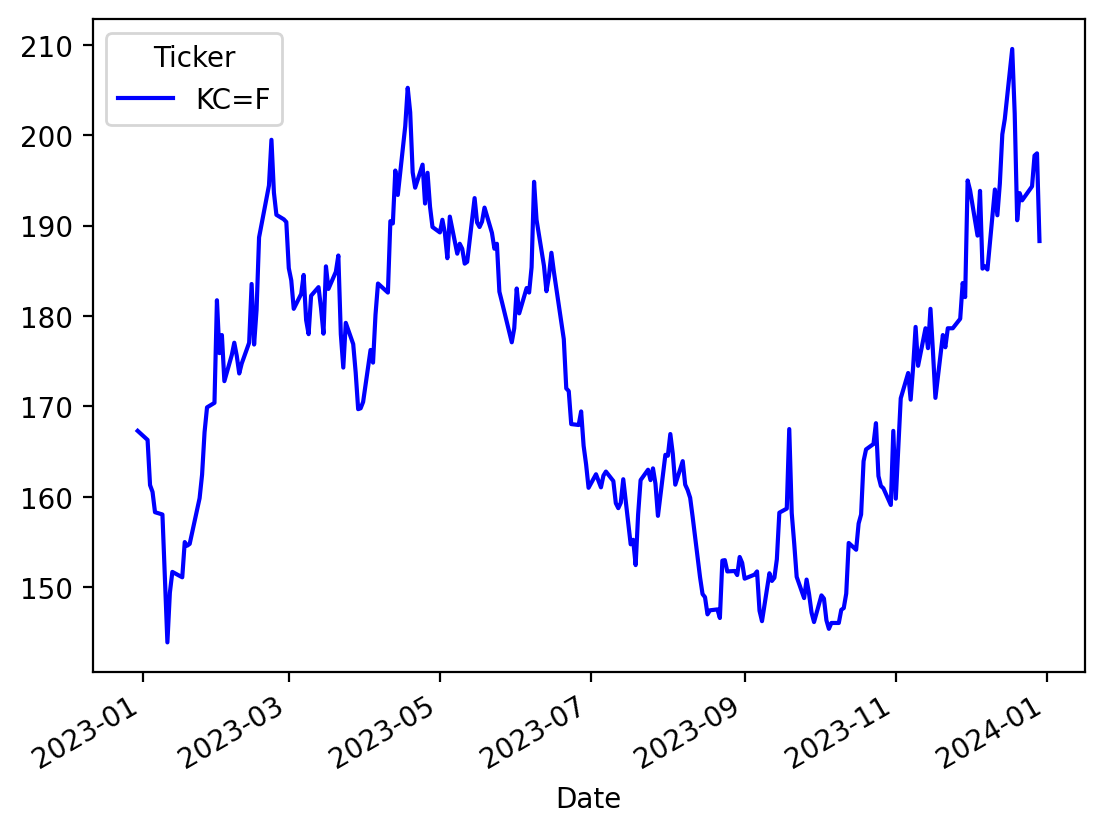

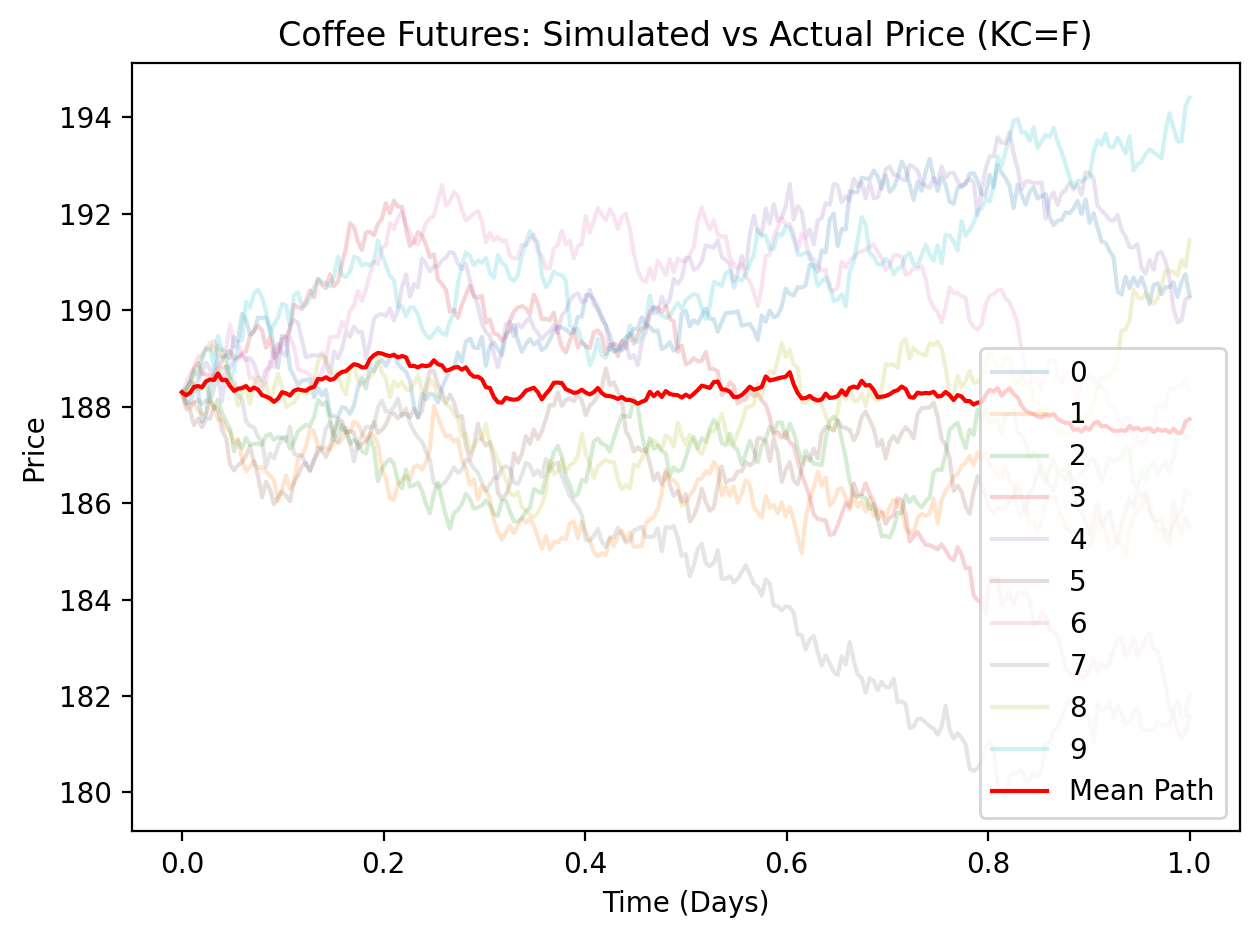

In [170]:
import matplotlib.pyplot as plt

# Plot the simulated paths
plt.figure(figsize=(10, 6))

# Plot actual historical data (for the last year)
data['Close'][-252:].plot(label='Actual Data', color='blue')

# Convert simulations to DataFrame for easier plotting
import pandas as pd
gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), index=time)

# Plot the GBM simulations
gbm_simulations_df.plot(alpha=0.2, legend=False)

# Plot the mean of the simulations
mean_line, = plt.plot(time, gbm_simulations_df.mean(axis=1), color='red', label='Mean Path')

# Adding labels and title
plt.title(f'Coffee Futures: Simulated vs Actual Price ({symbol})')
plt.xlabel('Time (Days)')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

In [173]:
from sklearn.metrics import mean_squared_error

# Get the actual closing price for the same time period as the simulation
actual_prices = data['Close'][-252:].values

# Calculate the mean of the simulations across all simulations for each time step
simulated_mean = gbm_simulations_df.mean(axis=1).values[1:]

# Ensure both arrays have the same length
min_length = min(len(actual_prices), len(simulated_mean))
actual_prices = actual_prices[:min_length]
simulated_mean = simulated_mean[:min_length]

# Calculate MSE between the simulated mean and actual data
mse = mean_squared_error(actual_prices, simulated_mean)
print(f"Mean Squared Error (MSE) between simulated mean and actual data: {mse}")

Mean Squared Error (MSE) between simulated mean and actual data: 508.46557333013385


##Calculating Performance Metrics

In [175]:
# Calculate the annualized return (mean) and volatility (std) from the simulations
annualized_return = np.mean(gbm_simulations_df.iloc[:, -1] / gbm_simulations_df.iloc[:, 0] - 1)  # CAGR
annualized_volatility = np.std(np.log(gbm_simulations_df.iloc[:, 1:].values / gbm_simulations_df.iloc[:, :-1].values), axis=1).mean() * np.sqrt(252)  # Annualized volatility

print(f"Annualized Return: {annualized_return * 100:.2f}%")
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")


Annualized Return: 0.42%
Annualized Volatility: 33.23%


##Monte Carlo Simulation *(Case given/defined)*

In [177]:
import numpy as np

# Simulation parameters
S_0 = 1.20  # Spot price in dollars
r = 0.02  # Risk-free rate (2%)
sigma = 0.25  # Volatility (25%)
T = 0.5  # Time to maturity in years
num_simulations = 10000  # Number of simulations
num_steps = 252  # Number of steps (daily)

# Time increment
dt = T / num_steps

# Simulating price paths
np.random.seed(42)  # For reproducibility
price_paths = np.zeros((num_steps, num_simulations))
price_paths[0] = S_0

for t in range(1, num_steps):
    z = np.random.standard_normal(num_simulations)
    price_paths[t] = price_paths[t-1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * z)

# Calculating the average simulated price at maturity
average_simulated_price = np.mean(price_paths[-1])
print(f"The average simulated price of the coffee futures contract at maturity is ${average_simulated_price:.3f}.")

The average simulated price of the coffee futures contract at maturity is $1.210.


##Black-Scholes Model *(Case is given/defined)*

In [178]:
from scipy.stats import norm
import numpy as np

# Given values
S_0 = 1.20  # Spot price in dollars
X = 1.25  # Strike price in dollars
r = 0.02  # Risk-free rate (2%)
T = 0.5  # Time to maturity in years
sigma = 0.25  # Volatility (25%)

# Calculating d1 and d2
d1 = (np.log(S_0 / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculating call option price using Black-Scholes formula
C = S_0 * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
print(f"The price of the call option is ${C:.3f}.")

The price of the call option is $0.068.
